<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-practice/blob/main/pretrained_models_ImageNet__dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
model = ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model

<Functional name=resnet50, built=True>

In [ ]:
img_path = '/content/laptop.jfif'
img = keras.utils.load_img(img_path, target_size=(224, 224))
x = keras.utils.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

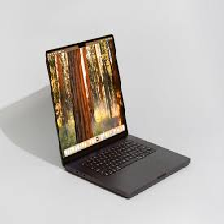

In [ ]:
img

In [ ]:
x

array([[[[115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         ...,
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ]],

        [[115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         ...,
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ]],

        [[115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         [115.061, 102.221,  95.32 ],
         ...,
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ],
         [114.061,  99.221,  92.32 ]],

        ...,

        [[117.061, 104.221,  97.32 ],
         [117.061, 104.221,  97.32 ],
         [117.061, 104.221,  97.32 ],
         ...,
         [125.061, 110.221, 103.32 ],
         [125.061, 110.221, 103.32 ],
         [125.061, 110.221, 103.32 ]],

        [[

In [ ]:
x.shape

(1, 224, 224, 3)

In [ ]:
preds = model.predict(x)

print('Predicted:', decode_predictions(preds, top=3)[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
Predicted: [('n03832673', 'notebook', np.float32(0.67579794)), ('n03642806', 'laptop', np.float32(0.10917388)), ('n03014705', 'chest', np.float32(0.045926694))]


In [ ]:
# Get the top prediction
top_prediction = decode_predictions(preds, top=1)[0][0]

# Assuming the true label is 'Indian_elephant'
true_label = 'notebook'

# Check if the prediction is accurate
is_accurate = top_prediction[1] == true_label

# Print the results
print('Predicted:', top_prediction)
print('True Label:', true_label)
print('Is Accurate:', is_accurate)

Predicted: ('n03832673', 'notebook', np.float32(0.67579794))
True Label: notebook
Is Accurate: True
